In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import emoji

In [3]:
import re

In [4]:
import numpy as np

In [5]:
import string

In [6]:
import pandas as pd

In [7]:
import nltk

In [8]:
from keras.callbacks import EarlyStopping

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
from nltk.stem.wordnet import WordNetLemmatizer

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.metrics import classification_report,accuracy_score

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
from tensorflow.keras.models import Sequential


In [17]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


In [18]:
from keras.callbacks import EarlyStopping

In [19]:
import tensorflow as tf


In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
import seaborn as sns

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
import xgboost as xgb

In [27]:
from sklearn.pipeline import Pipeline


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
from sklearn.metrics import classification_report

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.svm import SVC

In [32]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [33]:
import matplotlib.pyplot as plt

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
df=pd.read_csv("reviews_data.csv")


In [38]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [39]:
df.tail()

,name,location,Date,Rating,Review,Image_Links
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']
849,Christian,"Ramsey, NJ","Reviewed July 19, 2000",NaN,No Review Text,['No Images']


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [41]:
df.describe()

,Rating
count,705.000000
mean,1.870922
std,1.397672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [42]:
df.columns

Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links'], dtype='object')

In [43]:
df.shape

(850, 6)

In [44]:
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

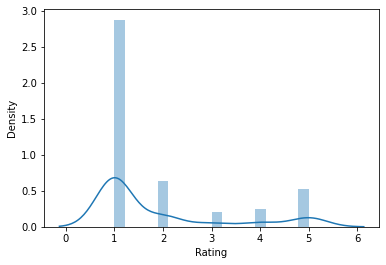

In [45]:
sns.distplot(df['Rating'])

In [46]:
median_val=df['Rating'].median()


In [47]:
df['Rating']=df['Rating'].fillna(median_val)

In [48]:
df['Rating'].value_counts()

1.0    596
2.0     99
5.0     83
4.0     39
3.0     33
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

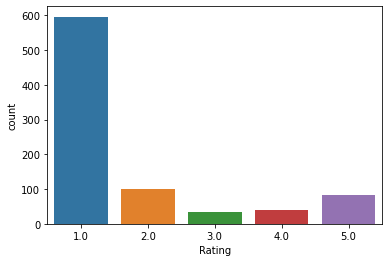

In [49]:
sns.countplot(x=df['Rating'])

# It's clear that our data is imbalanced in which the majorety of review tends to be negative

For Now we are going to split our data into 3 catagories : Positive , Negative and Neutral in which

Neutral : 0
Positive : 1
Negative : 2

In [50]:
df['Rating']=df['Rating'].replace([1,2],2)

In [51]:
df['Rating']=df['Rating'].replace([3],0)

In [52]:
df['Rating']=df['Rating'].replace([4,5],1)

In [53]:
df['Rating']=df['Rating'].astype(int)

In [54]:
df['Rating'].value_counts()

2    695
1    122
0     33
Name: Rating, dtype: int64

In [55]:
df=df[['Review','Rating']]

In [56]:
def cleaning (text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text

In [57]:
df['Review']=df['Review'].apply(cleaning)

In [58]:
df['Review']

0      amber and ladonna at the starbucks on southwes...
1         at the starbucks by the fire station on    ...
2      i just wanted to go out of my way to recognize...
3      me and my friend were at starbucks and my card...
4      i m on this kick of drinking   cups of warm wa...
                             ...                        
845    i ordered two venti frappacino s without whipp...
846                                       no review text
847    demanded tips from me  then made me wait until...
848                                       no review text
849                                       no review text
Name: Review, Length: 850, dtype: object

In [59]:
def lemm(data):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(data)):
        lemmed = []
        words = word_tokenize(data['Review'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    data['lemmanized'] = lemmanized
    data['Review'] = data['lemmanized'].apply(' '.join)
    data=data.drop("lemmanized",axis=1)
    return data

In [60]:
df=lemm(df)


In [61]:
df

,Review,Rating
0,amber and ladonna at the starbucks on southwes...,1
1,at the starbucks by the fire station on in alt...,1
2,i just wanted to go out of my way to recognize...,1
3,me and my friend were at starbucks and my card...,1
4,i m on this kick of drinking cup of warm water...,1
...,...,...
845,i ordered two venti frappacino s without whipp...,2
846,no review text,2
847,demanded tip from me then made me wait until m...,2
848,no review text,2


# Building RNN Model

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'],df['Rating'], test_size=0.20, random_state=42)

In [63]:
# Tokenize the reviews
tokenizer = Tokenizer(num_words=10000)


In [64]:
tokenizer

In [65]:
tokenizer.fit_on_texts(X_train)

In [66]:
X_train = tokenizer.texts_to_sequences(X_train)

In [67]:
X_train

[[7,
  40,
  414,
  20,
  15,
  109,
  29,
  21,
  140,
  2,
  75,
  45,
  5,
  347,
  20,
  549,
  23,
  37,
  229,
  50,
  382,
  2,
  52,
  1,
  192,
  9,
  8,
  13,
  105,
  40,
  348,
  30,
  1439,
  29,
  21,
  57,
  240,
  2,
  193,
  1785,
  35,
  15,
  5,
  282,
  20,
  29,
  14,
  30,
  21,
  57,
  204,
  9,
  66,
  10,
  1057],
 [301,
  2,
  315,
  13,
  1,
  47,
  402,
  68,
  175,
  1211,
  117,
  349,
  129,
  428,
  48,
  198,
  107,
  1,
  325,
  273,
  13,
  95,
  61,
  38,
  550,
  48,
  40,
  47,
  2493,
  31,
  49,
  9,
  2494,
  2,
  522,
  1,
  194,
  1786,
  2,
  936,
  1,
  1787,
  1788,
  461,
  9,
  937,
  10,
  195,
  7,
  36,
  2,
  72,
  1,
  262,
  4,
  1789,
  1,
  235,
  17,
  130,
  29,
  2495,
  14,
  2496,
  1,
  1058,
  9,
  1,
  130,
  48,
  6,
  47,
  3,
  1790,
  6,
  235,
  10,
  5,
  1212,
  2,
  1791,
  283,
  66,
  856,
  3,
  1,
  235,
  13,
  2,
  65,
  2497,
  4,
  150,
  17,
  130,
  2,
  383,
  71,
  199,
  4,
  8,
  25,
  43,
  3,
  87,


In [68]:
X_test = tokenizer.texts_to_sequences(X_test)

In [69]:
X_test

[[44,
  51,
  4,
  1,
  1513,
  3,
  504,
  382,
  1281,
  7,
  16,
  271,
  32,
  5,
  144,
  79,
  150,
  4,
  38,
  240,
  107,
  1,
  163,
  273,
  79,
  19,
  824,
  142,
  23,
  830,
  300,
  17,
  40,
  466,
  21,
  1866,
  3,
  21,
  364,
  360,
  26,
  41,
  2,
  51,
  4,
  156,
  5,
  233,
  10,
  1,
  1278,
  14,
  19,
  313,
  757,
  40,
  78,
  251,
  5,
  360,
  26,
  1077,
  1,
  36,
  15,
  496,
  50,
  506,
  25,
  43,
  67,
  550,
  5,
  734,
  1840,
  124,
  2239,
  43,
  129,
  2,
  19,
  63,
  446,
  374,
  862,
  718,
  212,
  32,
  3,
  1,
  1544,
  30,
  21,
  1315,
  133,
  895,
  74,
  14,
  127,
  100,
  1,
  1203,
  41,
  2,
  208,
  66,
  4,
  96,
  34,
  121,
  2,
  42,
  5,
  521,
  300,
  3,
  37,
  649],
 [2,
  52,
  1,
  105,
  1,
  1050,
  58,
  15,
  10,
  1,
  36,
  3,
  129,
  1,
  1185,
  1,
  143,
  30,
  344,
  3,
  3534,
  2,
  52,
  1,
  195,
  27,
  3,
  130,
  236,
  13,
  30,
  1155,
  499],
 [2,
  128,
  4,
  1713,
  6,
  151,
  17,
  1511

In [70]:
# Pad the sequences
X_train = pad_sequences(X_train, maxlen=50)
X_test = pad_sequences(X_test, maxlen=50)

In [71]:
X_train.shape

(680, 50)

In [72]:
X_test

array([[  25,   43,   67, ...,    3,   37,  649],
       [   0,    0,    0, ...,   30, 1155,  499],
       [   3,  397,   75, ...,    6,  187,  151],
       ...,
       [   0,    0,    0, ...,  109,    3, 1268],
       [   0,    0,    0, ...,    4,   22,   80],
       [   0,    0,    0, ...,    5,    1, 2171]])

In [73]:
# Convert the labels to categorical values
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [74]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [75]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [76]:
model = Sequential()
model.add(Embedding(10000, 200, input_length=50))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(100, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [77]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [78]:
early_stopping_monitor = EarlyStopping(patience=5)


In [79]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=[early_stopping_monitor])

Epoch 1/20
6/6 [==============================] - 3s 200ms/step - loss: 1.0700 - accuracy: 0.6971 - val_loss: 0.9980 - val_accuracy: 0.7588
Epoch 2/20
6/6 [==============================] - 1s 146ms/step - loss: 0.8086 - accuracy: 0.8324 - val_loss: 1.0181 - val_accuracy: 0.7588
Epoch 3/20
6/6 [==============================] - 1s 143ms/step - loss: 0.6675 - accuracy: 0.8324 - val_loss: 0.6888 - val_accuracy: 0.7588
Epoch 4/20
6/6 [==============================] - 1s 147ms/step - loss: 0.5536 - accuracy: 0.8324 - val_loss: 0.6431 - val_accuracy: 0.7588
Epoch 5/20
6/6 [==============================] - 1s 151ms/step - loss: 0.5468 - accuracy: 0.8324 - val_loss: 0.6557 - val_accuracy: 0.7588
Epoch 6/20
6/6 [==============================] - 1s 151ms/step - loss: 0.5174 - accuracy: 0.8324 - val_loss: 0.6842 - val_accuracy: 0.7588
Epoch 7/20
6/6 [==============================] - 1s 151ms/step - loss: 0.5016 - accuracy: 0.8324 - val_loss: 0.6418 - val_accuracy: 0.7588
Epoch 8/20
6/6 [====

In [80]:
y_pred_prob = model.predict(X_test)


6/6 [==============================] - 0s 20ms/step


In [81]:
y_pred = np.argmax(y_pred_prob, axis=1)


In [82]:
y_pred

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2], dtype=int64)

In [83]:
y_true = np.argmax(y_test, axis=1)


In [84]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8588235294117647


In [85]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.90      0.53      0.67        36
           2       0.85      0.98      0.91       129

    accuracy                           0.86       170
   macro avg       0.59      0.50      0.53       170
weighted avg       0.84      0.86      0.83       170



C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


scaledKNN
0.7911764705882354
scaledDT
0.7191176470588235
scaledXGB
0.8308823529411764
scaledRFC
0.8455882352941175


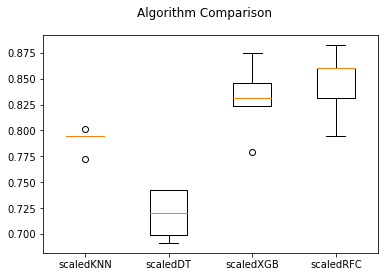

In [86]:
pipelines = []
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledXGB' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,xgb.XGBClassifier())]))))
pipelines.append(('scaledRFC' , (Pipeline([('scaled' , StandardScaler()),('RFC' ,RandomForestClassifier())]))))


model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=5)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold)
    results.append(crossv_results)
    model_name.append(pipe)

for i,j in zip(results,model_name):
    print(j)
    print(i.mean())
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()